In [11]:
import tensorflow as tf
from tensorflow.keras import datasets, models, layers, optimizers
import numpy as np
import matplotlib.pyplot as plt

In [12]:
DATASET = "CIFAR10"   # "MNIST" or "CIFAR10"

# --- Load dataset ---
datasets_map = {
    "MNIST": datasets.mnist,
    "CIFAR10": datasets.cifar10
}

(X_train, y_train), (X_test, y_test) = datasets_map[DATASET].load_data()

# --- Normalize ---
X_train = X_train.astype("float32") / 255.0
X_test  = X_test.astype("float32") / 255.0

# --- Flatten ---
X_train = X_train.reshape((X_train.shape[0], -1))
X_test  = X_test.reshape((X_test.shape[0], -1))

# --- Set input dimension ---
input_dim = X_train.shape[1]
num_classes = 10

print("Dataset:", DATASET)
print("Train shape:", X_train.shape, " Test shape:", X_test.shape)


Dataset: CIFAR10
Train shape: (50000, 3072)  Test shape: (10000, 3072)


In [13]:
# c) Define the network architecture using Keras (Feedforward MLP
model = models.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(512, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(128, activation="relu"),
    layers.Dense(num_classes, activation="softmax"),
])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,738,890 (6.63 MB)

 Trainable params: 1,738,890 (6.63 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# d) Train the model using SGD

sgd = optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=False)

model.compile(
    optimizer=sgd,
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=128,
    validation_split=0.2,
    verbose=1
)


Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.2568 - loss: 2.0138 - val_accuracy: 0.3278 - val_loss: 1.8643
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.3303 - loss: 1.8503 - val_accuracy: 0.3634 - val_loss: 1.7601
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.3521 - loss: 1.7904 - val_accuracy: 0.3895 - val_loss: 1.7077
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.3701 - loss: 1.7512 - val_accuracy: 0.4069 - val_loss: 1.6676
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.3839 - loss: 1.7178 - val_accuracy: 0.4125 - val_loss: 1.6506
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.3904 - loss: 1.6944 - val_accuracy: 0.4265 - val_loss: 1.6152
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.3977 - loss: 1.6692 - val_accuracy: 0.4325 - val_loss: 1.6058
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.4099 - loss: 1.6431 - val_ac

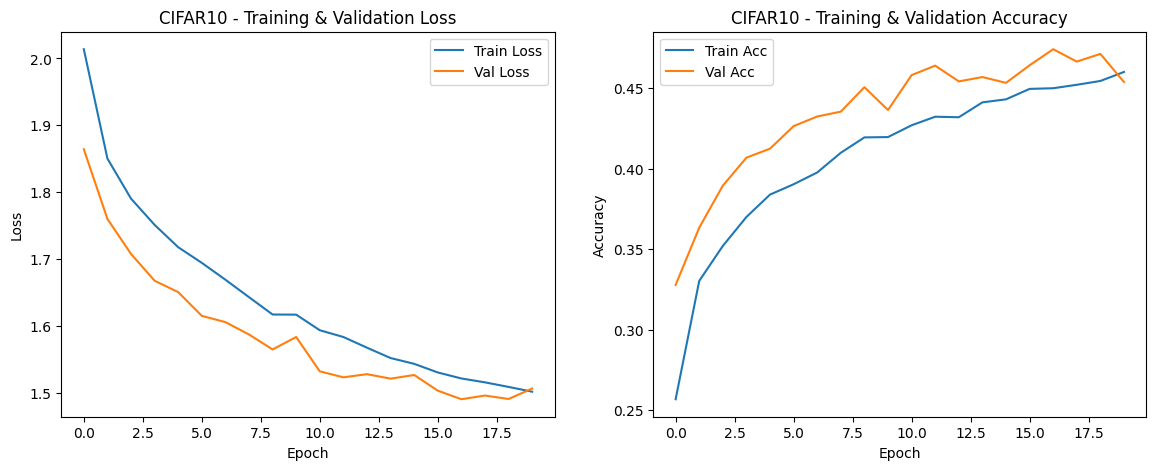

In [15]:
# f) Plot the training loss and accuracy

plt.figure(figsize=(14,5))

# Loss
plt.subplot(1,2,1)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.title(f"{DATASET} - Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# Accuracy
plt.subplot(1,2,2)
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.title(f"{DATASET} - Training & Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.show()